In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from implementation import NeuralNet
import pandas as pd
np.random.seed(0)

In [2]:
#for input from CSV file.
# data = np.genfromtxt("../data/train.csv", delimiter=",", skip_header=1, dtype=int)
# labels = data[:,0]
# images = data[:,1:]/255

# length = int(len(labels)*.9) #Train on the first 90%. Test on 10%
# training_labels, test_labels = labels[:length], labels[length:]
# training_images, test_images = images[:length], images[length:]

In [3]:
#for input from directly fetching mnist
mnist = fetch_openml('mnist_784', as_frame=False)
labels = mnist.target.astype(int)
images = mnist.data/255

length = 60_000 #Train on 60k, test on 10k
training_labels, test_labels = labels[:length], labels[length:]
training_images, test_images = images[:length], images[length:]

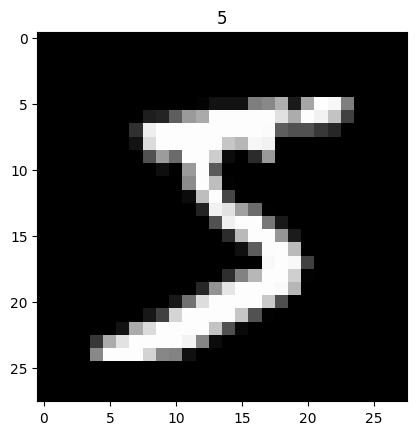

In [4]:
def export_csv(net, ext=""):
    df_biases_a1 = pd.DataFrame(net.biases[0])
    df_biases_a2 = pd.DataFrame(net.biases[1])
    df_biases_o = pd.DataFrame(net.biases[2])
    
    df_weight_a1 = pd.DataFrame(net.weights[0])
    df_weight_a2 = pd.DataFrame(net.weights[1])
    df_weight_o = pd.DataFrame(net.weights[2])

    df_biases_a1.to_csv(f'../data/biases_a1{ext}.csv', index=False)
    df_biases_a2.to_csv(f'../data/biases_a2{ext}.csv' , index=False)
    df_biases_o.to_csv(f'../data/biases_o{ext}.csv', index=False)

    df_weight_a1.to_csv(f'../data/weights_a1{ext}.csv', index=False)
    df_weight_a2.to_csv(f'../data/weights_a2{ext}.csv', index=False)
    df_weight_o.to_csv(f'../data/weights_o{ext}.csv', index=False)

def plot_image(i):
    plt.imshow(images[i,:].reshape(28,28), cmap="gray")
    plt.title(labels[i])
    plt.show()
plot_image(0)

In [5]:
net = NeuralNet([784, 300, 300, 10])
__export__init__ = False
if __export__init__:
    print(np.shape(net.biases[0]))
    print(np.shape(net.biases[1]))
    print(np.shape(net.biases[2]))
    
    print(np.shape(net.weights[0]))
    print(np.shape(net.weights[1]))
    print(np.shape(net.weights[2]))
    export_csv(net, "_init")

In [6]:
%%time
#Evaluate the model before training
net.evaluate((test_labels, test_images))

CPU times: total: 125 ms
Wall time: 538 ms


0.1113

In [7]:
%%time
net.train(training_data=(training_labels, training_images), iterations=1, batch_size=10, learning_rate=0.1)
net.evaluate((test_labels, test_images))

CPU times: total: 51.6 s
Wall time: 1min 39s


0.9119

In [8]:
%%time
#time the model on 60k images for reference.
net.evaluate((training_labels, training_images))

CPU times: total: 1.2 s
Wall time: 2.86 s


0.9239833333333334

In [9]:
#export final weights and biases for use elsewhere
if __export__init__:
    export_csv(net)

In [10]:
dweights, dbiases = net.propagate_backwards(test_labels[0], test_images[0])